# CAISO RA Analysis

## Imports

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings("ignore")

In [74]:
import requests
import zipfile
import io
import pandas as pd

BASE_URL = "http://oasis.caiso.com/oasisapi/SingleZip"

def fetch_caiso_data(queryname, start, end, extra_params=None):
    params = {
        "queryname": queryname,
        "startdatetime": start,
        "enddatetime": end,
        "version": "1",
        "resultformat": "6"  # CSV
    }

    if extra_params:
        params.update(extra_params)

    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()

    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        csv_files = [name for name in z.namelist() if name.endswith('.csv')]
        if not csv_files:
            print(f"⚠️ No CSV files found in the ZIP for query: {queryname}")
            return pd.DataFrame()
        df = pd.read_csv(z.open(csv_files[0]))
    return df

# Date range
start = "20250701T07:00-0000"
end   = "20250702T07:00-0000"

# Forecasted Load (Day-Ahead Market)
forecast_df = fetch_caiso_data("SLD_FCST", start, end, {"market_run_id": "DAM"})

# Actual Load (Real-Time Market)
actual_df = fetch_caiso_data("SLD_FCST", start, end, {"market_run_id": "RTM"})

# Optional: Display a preview
print("✅ Forecast and Actual load data downloaded.")
#print("\nForecast Load:\n", forecast_df.head())
#print("\nActual Load:\n", actual_df.head())

✅ Forecast and Actual load data downloaded.


In [75]:
actual_df.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
0,2025-07-02T01:00:00-00:00,2025-07-02T01:15:00-00:00,0,2025-07-01,19,1,RTM,AVA,RTM 15Min Load Forecast,SYS_FCST_15MIN_MW,4.8,1920.06,RTPD,1
1,2025-07-02T03:45:00-00:00,2025-07-02T04:00:00-00:00,0,2025-07-01,21,4,RTM,AVA,RTM 15Min Load Forecast,SYS_FCST_15MIN_MW,4.8,1697.33,RTPD,1
2,2025-07-01T07:30:00-00:00,2025-07-01T07:45:00-00:00,0,2025-07-01,1,3,RTM,AVA,RTM 15Min Load Forecast,SYS_FCST_15MIN_MW,4.8,1078.75,RTPD,1
3,2025-07-01T08:00:00-00:00,2025-07-01T08:15:00-00:00,0,2025-07-01,2,1,RTM,AVA,RTM 15Min Load Forecast,SYS_FCST_15MIN_MW,4.8,1035.03,RTPD,1
4,2025-07-01T09:45:00-00:00,2025-07-01T10:00:00-00:00,0,2025-07-01,3,4,RTM,AVA,RTM 15Min Load Forecast,SYS_FCST_15MIN_MW,4.8,950.48,RTPD,1


In [76]:
forecast_df.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
0,2025-07-01T10:00:00-00:00,2025-07-01T11:00:00-00:00,1,2025-07-01,4,0,DAM,AVA,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,930.01,DAM,1
1,2025-07-01T21:00:00-00:00,2025-07-01T22:00:00-00:00,1,2025-07-01,15,0,DAM,AVA,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,1818.50,DAM,1
2,2025-07-01T20:00:00-00:00,2025-07-01T21:00:00-00:00,1,2025-07-01,14,0,DAM,AVA,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,1759.73,DAM,1
3,2025-07-01T17:00:00-00:00,2025-07-01T18:00:00-00:00,1,2025-07-01,11,0,DAM,AVA,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,1489.37,DAM,1
4,2025-07-01T23:00:00-00:00,2025-07-02T00:00:00-00:00,1,2025-07-01,17,0,DAM,AVA,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,1897.87,DAM,1


In [77]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INTERVALSTARTTIME_GMT  13440 non-null  object 
 1   INTERVALENDTIME_GMT    13440 non-null  object 
 2   LOAD_TYPE              13440 non-null  int64  
 3   OPR_DT                 13440 non-null  object 
 4   OPR_HR                 13440 non-null  int64  
 5   OPR_INTERVAL           13440 non-null  int64  
 6   MARKET_RUN_ID          13440 non-null  object 
 7   TAC_AREA_NAME          13440 non-null  object 
 8   LABEL                  13440 non-null  object 
 9   XML_DATA_ITEM          13440 non-null  object 
 10  POS                    13440 non-null  float64
 11  MW                     13440 non-null  float64
 12  EXECUTION_TYPE         13440 non-null  object 
 13  GROUP                  13440 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 1.4+ 

In [78]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INTERVALSTARTTIME_GMT  816 non-null    object 
 1   INTERVALENDTIME_GMT    816 non-null    object 
 2   LOAD_TYPE              816 non-null    int64  
 3   OPR_DT                 816 non-null    object 
 4   OPR_HR                 816 non-null    int64  
 5   OPR_INTERVAL           816 non-null    int64  
 6   MARKET_RUN_ID          816 non-null    object 
 7   TAC_AREA_NAME          816 non-null    object 
 8   LABEL                  816 non-null    object 
 9   XML_DATA_ITEM          816 non-null    object 
 10  POS                    816 non-null    float64
 11  MW                     816 non-null    float64
 12  EXECUTION_TYPE         816 non-null    object 
 13  GROUP                  816 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 89.4+ KB


## Data Cleaning and Preparation

In [79]:
system_forecast_df = forecast_df[forecast_df["TAC_AREA_NAME"] == "CA ISO-TAC"]
system_actual_df = actual_df[actual_df["TAC_AREA_NAME"] == "CA ISO-TAC"]

In [80]:
# Step 1: Filter for system-wide total (CA ISO-TAC only)
forecast_df_filtered = forecast_df[forecast_df["TAC_AREA_NAME"] == "CA ISO-TAC"]
actual_df_filtered = actual_df[actual_df["TAC_AREA_NAME"] == "CA ISO-TAC"]

# Step 2: Group by date and hour, take the average MW for each hour
forecast_hourly = forecast_df_filtered.groupby(["OPR_DT", "OPR_HR"])["MW"].mean().reset_index()
actual_hourly = actual_df_filtered.groupby(["OPR_DT", "OPR_HR"])["MW"].mean().reset_index()

# Step 3: Merge the two DataFrames on date and hour
merged_df = pd.merge(forecast_hourly, actual_hourly, on=["OPR_DT", "OPR_HR"], suffixes=('_forecast', '_actual'))

# Step 4: Calculate error metrics
merged_df["abs_error"] = (merged_df["MW_forecast"] - merged_df["MW_actual"]).abs()
merged_df["percent_error"] = (merged_df["abs_error"] / merged_df["MW_actual"]) * 100

# Optional: Preview
print(merged_df.head())

       OPR_DT  OPR_HR  MW_forecast     MW_actual   abs_error  percent_error
0  2025-07-01       1     26546.75  25832.726875  714.023125       2.764025
1  2025-07-01       2     24971.86  24290.641250  681.218750       2.804449
2  2025-07-01       3     23670.59  23022.783125  647.806875       2.813764
3  2025-07-01       4     22977.62  22289.250000  688.370000       3.088350
4  2025-07-01       5     22990.22  22261.622500  728.597500       3.272886


In [81]:
forecast_df["TAC_AREA_NAME"].unique()

array(['AVA', 'AVRN', 'AZPS', 'BANC', 'BANCMID', 'BANCRDNG', 'BANCRSVL',
       'BANCSMUD', 'BANCWASN', 'BPAT', 'CA ISO-TAC', 'EPE', 'IPCO',
       'LADWP', 'MWD-TAC', 'NEVP', 'NWMT', 'PACE', 'PACW', 'PGE',
       'PGE-TAC', 'PNM', 'PSEI', 'SCE-TAC', 'SCL', 'SDGE-TAC', 'SRP',
       'TEPC', 'TIDC', 'TPWR', 'VEA-TAC', 'WALC', 'WALCAEPCO', 'WALCDSW'],
      dtype=object)

In [82]:
# Step 1: Filter for system-wide total (PGE-TAC only)
forecast_df_filtered = forecast_df[forecast_df["TAC_AREA_NAME"] == "PGE-TAC"]
actual_df_filtered = actual_df[actual_df["TAC_AREA_NAME"] == "PGE-TAC"]

# Step 2: Group by date and hour, take the average MW for each hour
forecast_hourly = forecast_df_filtered.groupby(["OPR_DT", "OPR_HR"])["MW"].mean().reset_index()
actual_hourly = actual_df_filtered.groupby(["OPR_DT", "OPR_HR"])["MW"].mean().reset_index()

# Step 3: Merge the two DataFrames on date and hour
merged_df = pd.merge(forecast_hourly, actual_hourly, on=["OPR_DT", "OPR_HR"], suffixes=('_forecast', '_actual'))

# Step 4: Calculate error metrics
merged_df["abs_error"] = (merged_df["MW_forecast"] - merged_df["MW_actual"]).abs()
merged_df["percent_error"] = (merged_df["abs_error"] / merged_df["MW_actual"]) * 100

# Optional: Preview
print(merged_df.head())

       OPR_DT  OPR_HR  MW_forecast     MW_actual    abs_error  percent_error
0  2025-07-01       1     12207.74  11127.883125  1079.856875       9.704064
1  2025-07-01       2     11476.31  10481.781250   994.528750       9.488165
2  2025-07-01       3     10927.92   9978.873125   949.046875       9.510562
3  2025-07-01       4     10658.46   9658.394375  1000.065625      10.354367
4  2025-07-01       5     10690.11   9664.208125  1025.901875      10.615478


In [83]:
merged_df.head()

,OPR_DT,OPR_HR,MW_forecast,MW_actual,abs_error,percent_error
0,2025-07-01,1,12207.74,11127.883125,1079.856875,9.704064
1,2025-07-01,2,11476.31,10481.781250,994.528750,9.488165
2,2025-07-01,3,10927.92,9978.873125,949.046875,9.510562
3,2025-07-01,4,10658.46,9658.394375,1000.065625,10.354367
4,2025-07-01,5,10690.11,9664.208125,1025.901875,10.615478


## Plots

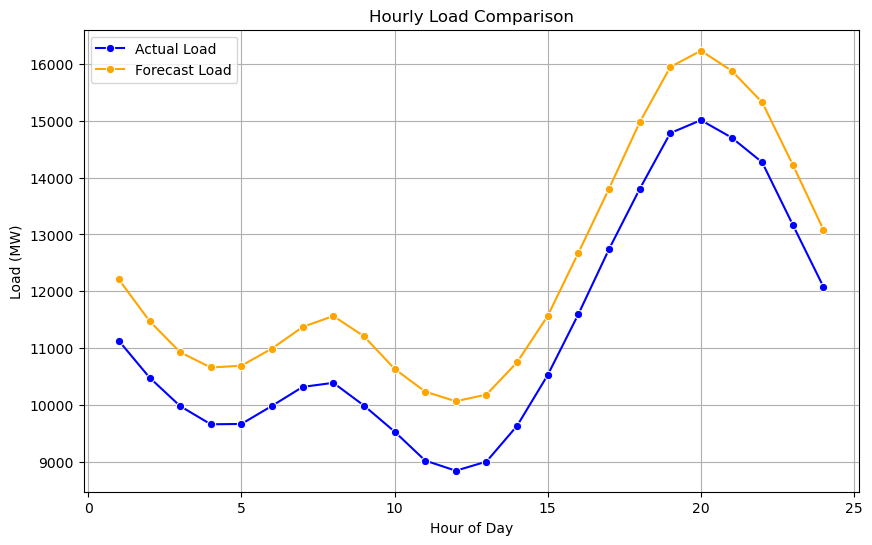

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x="OPR_HR", y="MW_actual", marker='o', color='blue', label='Actual Load')
sns.lineplot(data=merged_df, x="OPR_HR", y="MW_forecast", marker='o', color='orange', label='Forecast Load')
plt.title("Hourly Load Comparison")
plt.xlabel("Hour of Day")
plt.ylabel("Load (MW)")
plt.legend()
plt.grid(True)
plt.show()

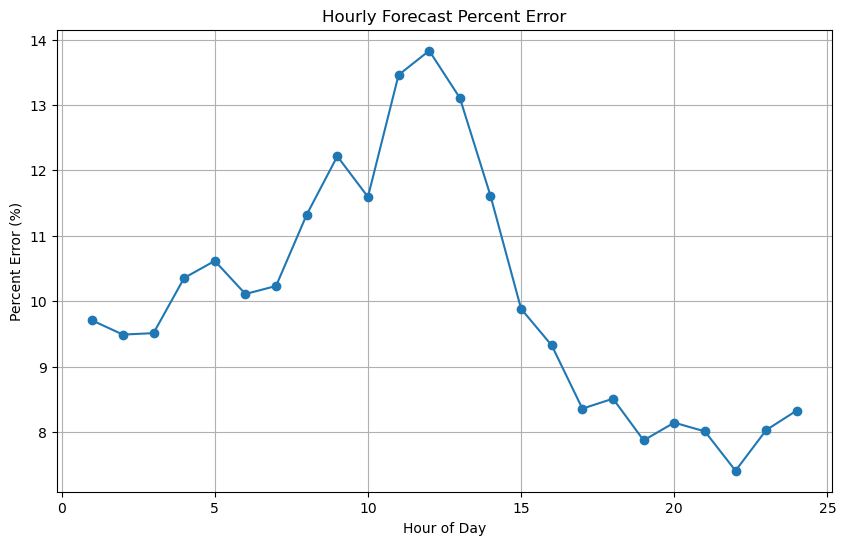

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged_df["OPR_HR"], merged_df["percent_error"], marker='o')
plt.title("Hourly Forecast Percent Error")
plt.xlabel("Hour of Day")
plt.ylabel("Percent Error (%)")
plt.grid(True)
plt.show()


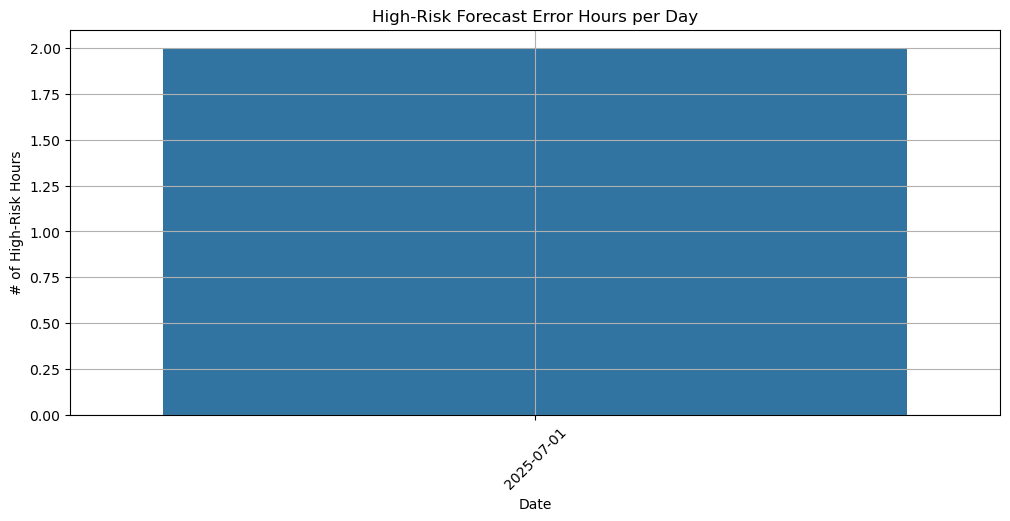

In [86]:
threshold = merged_df["percent_error"].quantile(0.95)
high_risk_hours = merged_df[merged_df["percent_error"] > threshold]

# Count how many risky hours per day
risky_hour_counts = high_risk_hours.groupby("OPR_DT").size().reset_index(name="num_high_risk_hours")

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=risky_hour_counts, x="OPR_DT", y="num_high_risk_hours")
plt.xticks(rotation=45)
plt.title("High-Risk Forecast Error Hours per Day")
plt.ylabel("# of High-Risk Hours")
plt.xlabel("Date")
plt.grid(True)
plt.show()

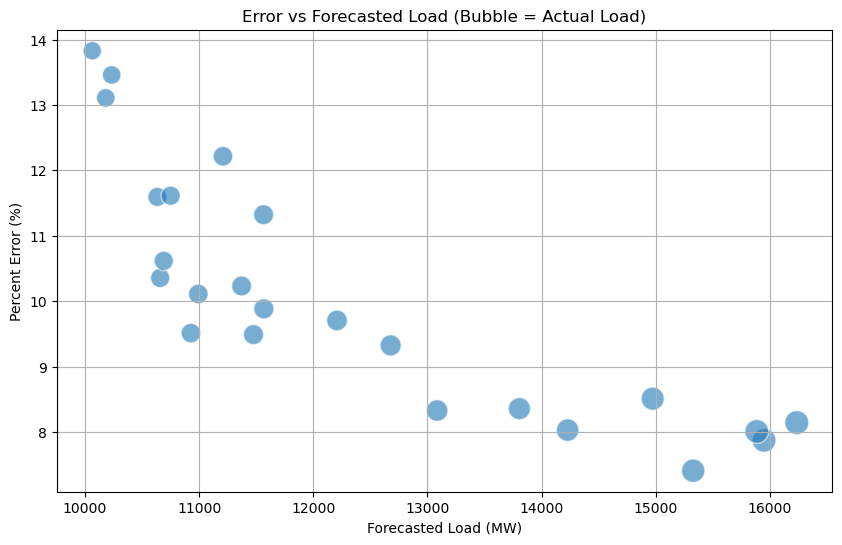

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["MW_forecast"], merged_df["percent_error"], 
            s=merged_df["MW_actual"] / 50, alpha=0.6, edgecolors='w')
plt.xlabel("Forecasted Load (MW)")
plt.ylabel("Percent Error (%)")
plt.title("Error vs Forecasted Load (Bubble = Actual Load)")
plt.grid(True)
plt.show()


In [88]:
merged_df["forecast_bias"] = merged_df["MW_forecast"] - merged_df["MW_actual"]
underforecasted = merged_df[merged_df["forecast_bias"] < 0]

total_missed_mw = underforecasted["forecast_bias"].sum()
print(f"🔴 Total underforecasted capacity: {abs(total_missed_mw):,.2f} MW")

🔴 Total underforecasted capacity: 0.00 MW


In [89]:
print("🔍 Summary Statistics")
print("Mean Absolute Error (MW):", merged_df["abs_error"].mean())
print("Mean Percent Error (%):", merged_df["percent_error"].mean())
print("Total Overforecasted MW:", merged_df[merged_df["forecast_bias"] > 0]["forecast_bias"].sum())
print("Total Underforecasted MW:", merged_df[merged_df["forecast_bias"] < 0]["forecast_bias"].sum())

🔍 Summary Statistics
Mean Absolute Error (MW): 1099.7518750000002
Mean Percent Error (%): 10.041787225196778
Total Overforecasted MW: 26394.045000000006
Total Underforecasted MW: 0.0


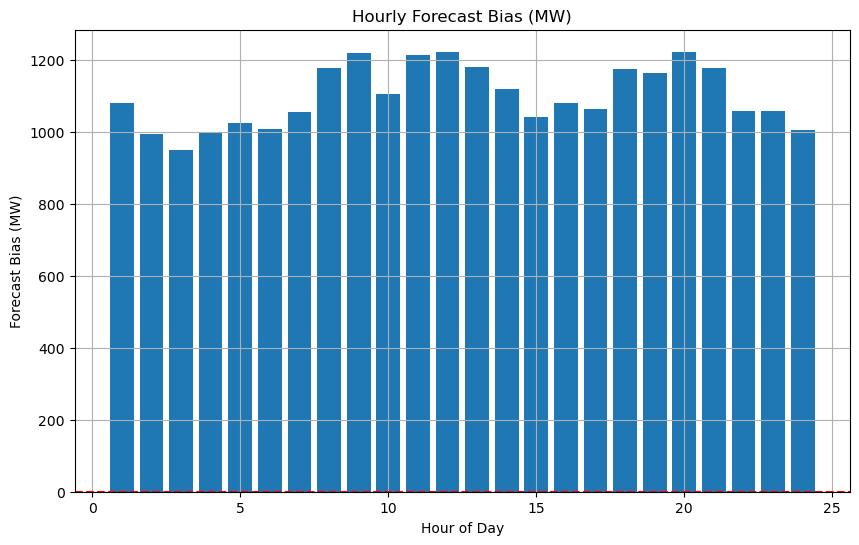

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df["OPR_HR"], merged_df["forecast_bias"])
plt.axhline(0, color='red', linestyle='--')
plt.title("Hourly Forecast Bias (MW)")
plt.xlabel("Hour of Day")
plt.ylabel("Forecast Bias (MW)")
plt.grid(True)
plt.show()

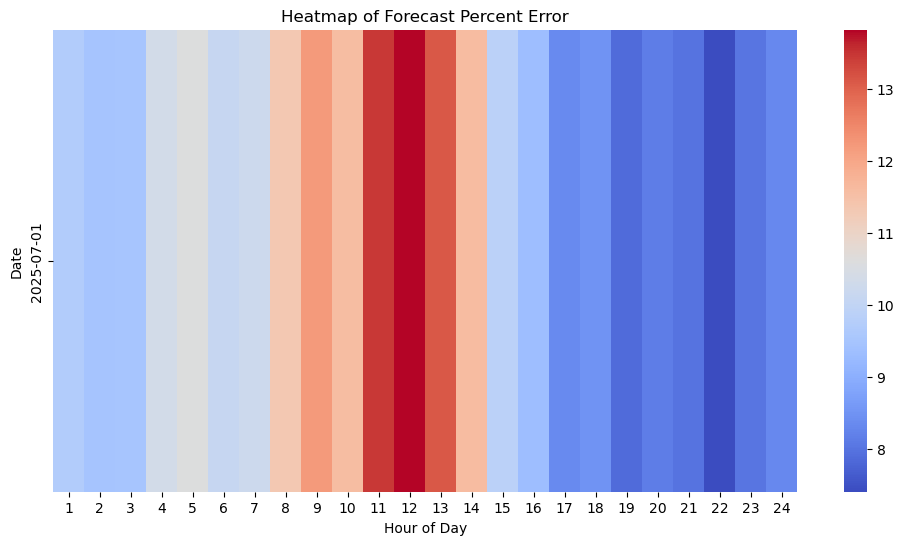

In [91]:
import seaborn as sns

heatmap_df = merged_df.pivot(index="OPR_DT", columns="OPR_HR", values="percent_error")
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap="coolwarm", annot=False)
plt.title("Heatmap of Forecast Percent Error")
plt.xlabel("Hour of Day")
plt.ylabel("Date")
plt.show()


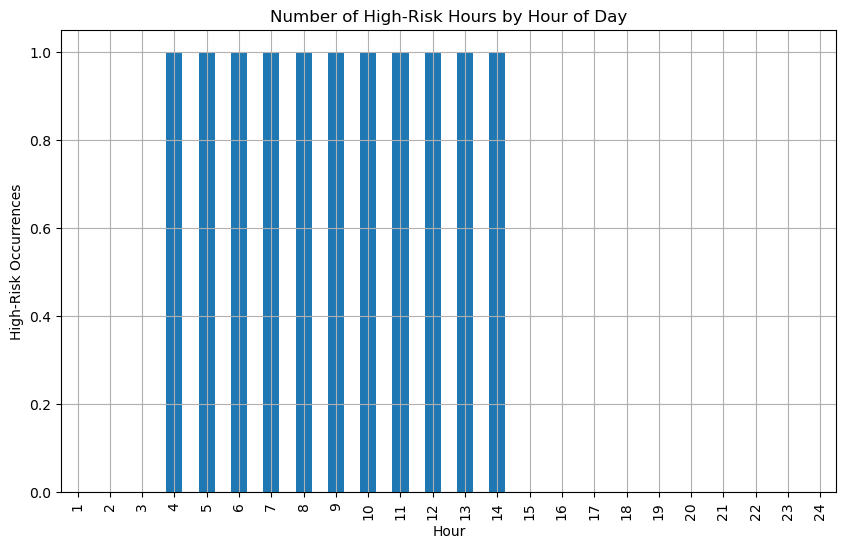

In [92]:
merged_df["high_risk"] = merged_df["percent_error"] > 10
high_risk_by_hour = merged_df.groupby("OPR_HR")["high_risk"].sum()

plt.figure(figsize=(10, 6))
high_risk_by_hour.plot(kind="bar")
plt.title("Number of High-Risk Hours by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("High-Risk Occurrences")
plt.grid(True)
plt.show()
